# Исследование объявлений о продаже квартир

Данные предоставлены сервисом Яндекс.Недвижимость и представляют собой архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014-2019 годы. 

По каждому объекту недвижимости в датасете доступны два вида данных: первые вписаны самим пользователем, вторые — получены автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма). 

**Цель исследования:** установление параметров для автоматизации определения рыночной стоимости объектов недвижимости

**Задачи исследования:** 

- определить пригодность исходных данных для дальнейшего анализа, провести предобработку данных;
- выявить наиболее частотные, а также малохарактерные значения различных параметров объектов недвижимости;
- провести анализ влияния различных параметров на общую стоимость объектов;
- рассчитать цену квадратного метра объектов недвижимости;
- сформулировать критерии для автоматического определения стоимости объектов недвижимости. 

## Краткие выводы по результатам анализа

Наибольшей частотностью обладают объекты недвижимости:

- общей площадью 25-60 кв. метров;
- жилой площадью в диапазоне 15-22 кв. метров и 27-32 кв. метров (преимущественно апартаменты).
- с площадью кухни - 5-15 кв. метров,
- ценой объекта - 3-6 млн. рублей,
- количеством комнат - 1-3;
- с расположением ни на первом и ни на последнем этаже;
- в зданиях высотой в 5 и 9 этажей;
- на расстоянии 10-18 км от центра города;
- с ближайшим парком в 500 метрах от дома. 

Для объектов с небольшой и средней общей площадью до 130 кв. метров, жилой площадью до 75 кв. метров, кухней до 15 кв. метров и количеством комнат до 4 площадь и количество комнат оказывают прямое влинияние на полную стоимость. С ростом площади объекта корреляция снижается, на стоимость начинают сильнее влиять прочие параметры объекта. 

На снижение общей стоимости оказывает влияние расположение на первом и последнем этаже. 

Рынок недвижимости Ленинградской области отличается сезонностью с пиками размещения наиболее высокостоимостных объектов (как результат увеличения спроса) в апреле, сентябре и ноябре. Также он находится в прямой зависимости от общего экономического положения в стране. 

Населенные пункты с наибольшей ценой квадратного метра - Зеленогорск и Санкт-Петербург, самая дешевая недвижимость в деревне Старополье. 

По мере удаления от центра стоимость недвижимости планомерно снижается на отрезке от 0 до 25 км, далее она пиково растет при расположении квартир в элитных переферийных районах на расстоянии от 25 до 30 км от центра. 

## Обзор данных

Импортируем необходимые для проведения анализа данных библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
from IPython.display import display, HTML

Прочитаем файл `real_estate_data.csv` с данными (путь к данным храниться в файле формата json) и сохраним его в переменной `data`:

In [2]:
# Чтение JSON файла
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)

# Чтение данных для набора 'dataset_path_estate' с разделителем табуляции
dataset_path = config['dataset_path_estate']
data = pd.read_csv(dataset_path, sep="\t")

Уберем ограничения при отображении количества столбцов, строк, ширины столбцов.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Выведем первые 10 строчек датафрейма `data` на экран.

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме с помощью метода `info()`.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы для всех числовых столбцов таблицы.

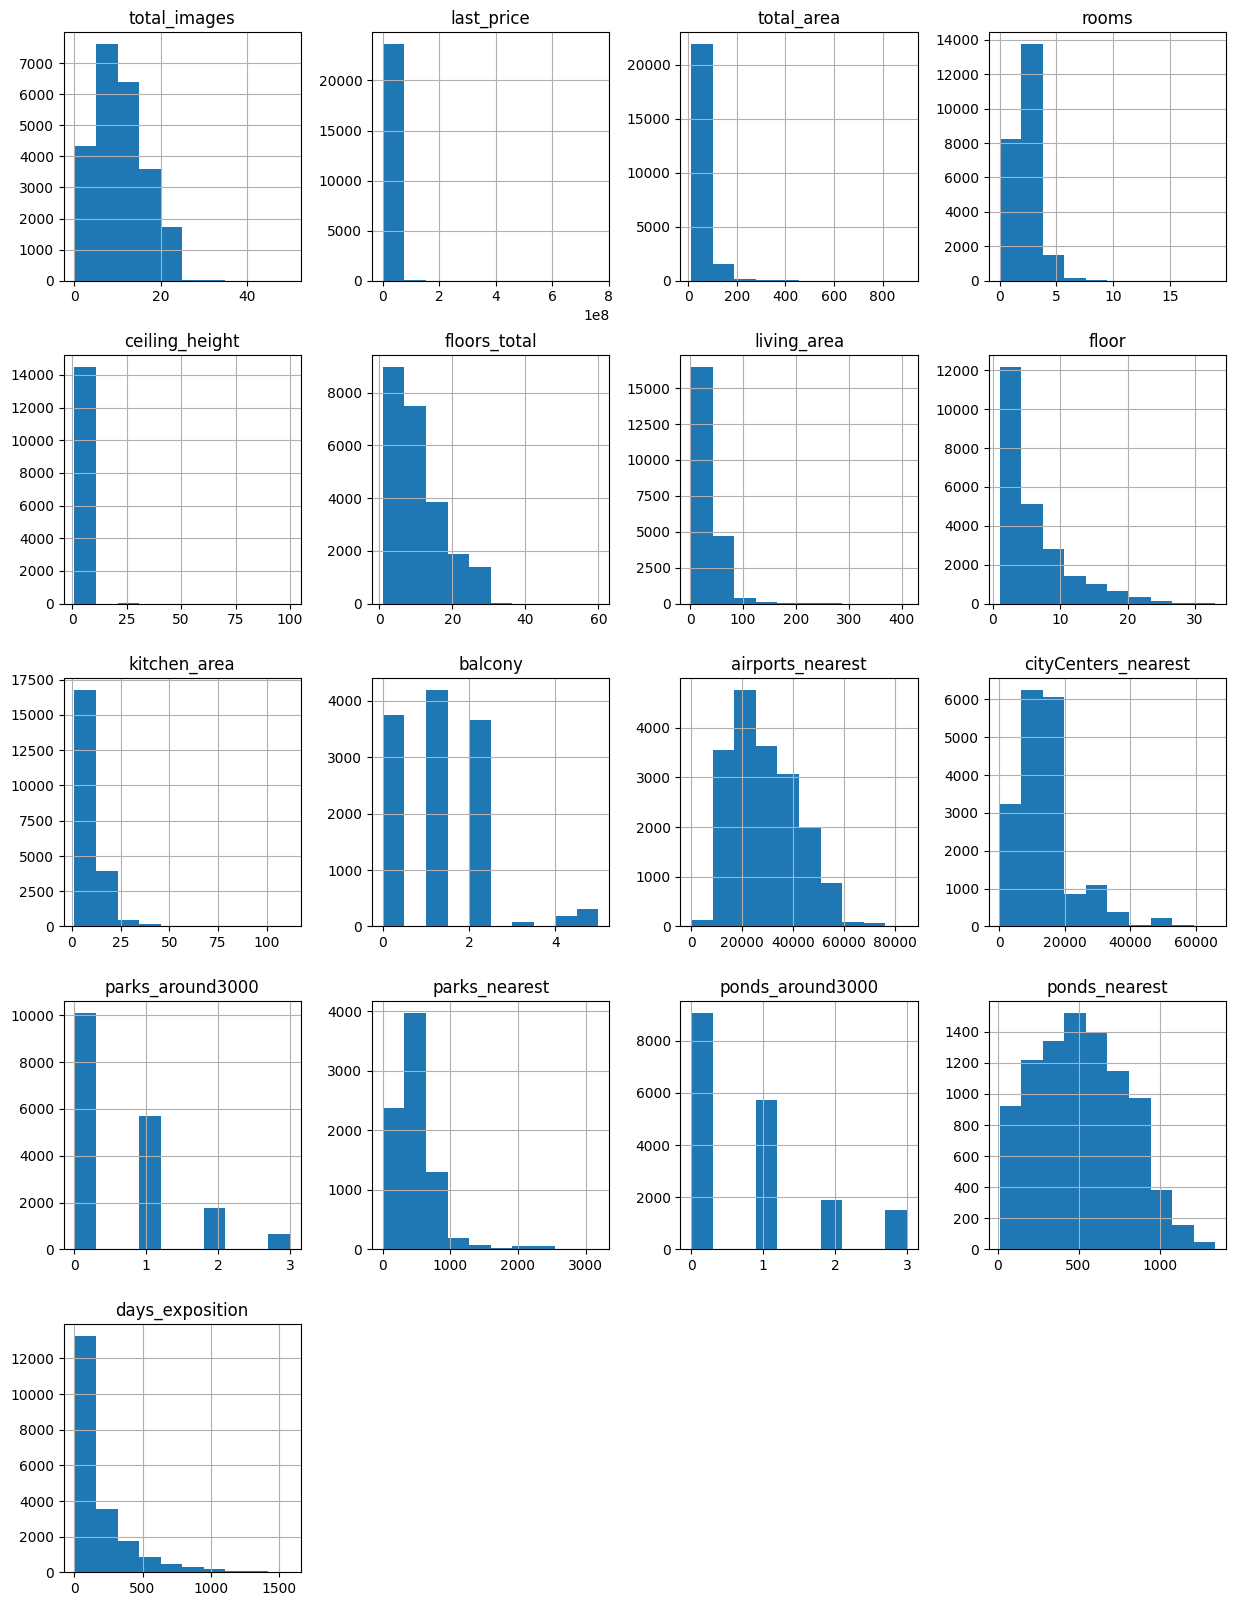

In [6]:
data.hist(figsize=(15, 20));

Все столбцы содержат данные, однако полнота этих данных не одинакова по столбцам. Из выведенных диаграмм видно, что по некоторым столбцам имеются аномально высокие, выбивающиеся значения. В дальнем ходе исследования необходимо будет оценить, какие из этих значений критически важны для анализа, а какие можно будет исключить. 

## Предобработка данных

### Заполнение пропусков

На данном этапе найдем и, по возможности, устраним пропуски значений в столбцах, а также при необходимости скорректируем типы данных в столбцах для дальнейшего анализа. 

Выведем количество пропущенных значений для каждого столбца.

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Определим возможность заполнения пропущенных значений для каждого из столбцов.

**Столбец ceiling_height**

По столбцу `ceiling_height` можно было бы предположить, что его значения зависят от общей площади объекта. В этом случае можно было бы сгруппировать данные по площади и рассчитать для каждой группы медианное значение высоты потолков. Проверим эту гипотезу, рассчитав коэффициент корреляции:

In [8]:
data['ceiling_height'].corr(data['total_area']).round(3)

0.095

В связи с тем, что коэффициент корреляции крайне низок, оставим пропуски по столбцу `ceiling_height` незаполненными.

**Столбец floors_total**

Поскольку количество пропусков в столбце `floors_total` крайне мало (86 из 23 699) по сравнению с общим количеством значений в таблице, заполним их значениями из столбца `floor`:

In [9]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

**Столбец living_area**

Для заполнения пропусков в столбце `living_area` найдем корреляцию их значений со значениями столбца `total_area`.

In [10]:
data['living_area'].corr(data['total_area']).round(3)

0.94

По результатам рассчетом зависимость прямая и значительная, поскольку стремится к единице. 
Выведем гистограмму и список характерных значений столбца `total_area`.

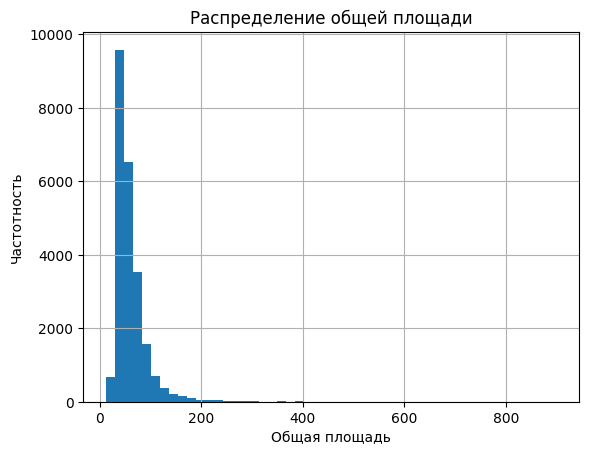

In [11]:
data['total_area'].hist(bins=50)
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Частотность')
plt.show()

In [12]:
# Выведем описание столбца `total_area`
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Поскольку в данном столбце отсутствуют пропущенные значения, используем значения квартилей столбца `total_area` для построения функции, которая сгруппирует объекты недвижимости по их площади:

In [13]:
def area_size(size):
    """
    Функция классифицирует площадь объекта на четыре категории: 'Small', 'Medium', 
    'Large' и 'Extra_Large' в зависимости от значения 'size'. 

    Параметры:
    size (int или float): Площадь, которую нужно классифицировать.

    Возвращает:
    str: Категория размера площади ('Small', 'Medium', 'Large', 'Extra_Large').
    """
    try:
        if 12 <= size <= 40:
            return 'Small'
        elif 40 <= size <= 52:
            return 'Medium'
        elif 52 <= size <= 69:
            return 'Large'
        elif size >= 69:
            return 'Extra_Large'
    except:
        pass

In [14]:
# Создаем новый столбец с категорией размера объекта недвижимости 
data['total_area_category'] = data['total_area'].apply(area_size)

Заполним пропуски в столбце `living_area` медианными значениями жилой площадки в зависимости от категории объекта недвижимости:

In [15]:
for t in data['total_area_category'].unique():
    data.loc[(data['total_area_category'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area_category'] == t), 'living_area'].median()

**Столбец is_apartment**

Выведем уникальные значения для данного столбца:

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

В столбце либо присутствуют булевые значения, либо значения отсутствуют. В этой связи логично предположить, что если владелец объекта недвижимости не отметил это отдельно, объект недвижимости не является апартаментами. В этой связи заменим все пропущенные значения на `False`:

In [17]:
data['is_apartment'] = data['is_apartment'].fillna('False')

**Столбец kitchen_area**

Заполним пропуски в столбце `kitchen_area` по аналогии со столбцом `living_area`:

In [18]:
for t in data['total_area_category'].unique():
    data.loc[(data['total_area_category'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area_category'] == t), 'kitchen_area'].median()

**Столбец balcony**

Выведем уникальные значения столбца `balcony`.

In [19]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Здесь также логично предположить, что если владелец не указал данные о количестве балконов, для данного объекта недвижимости они отсутствуют. Поэтому заменим отсутствующие значения на 0:

In [20]:
data['balcony'] = data['balcony'].fillna(0)

**Столбец locality_name**

Поскольку количество пропусков в столбце `locality_name` ничтожно мало, а восстановить пропущенные значения по остальным данным не представляется возможным, предлагаем оставить пропуски в данном столбце без заполнения.

Для дальнейшего устранения пропусков в данных предлагаем сначала устранить недостатки в данных в столбце `locality_name`, удалив неявные дубликаты. Для начала выведем список уникальных значений данного столбца, отсортируем его и посчитаем количество значений:

In [21]:
# Изменим тип данных в столбце locality_name на str
data['locality_name'] = data['locality_name'].astype(str)

In [22]:
# Выведем список уникальных значений расположения жилых объектов
unique_locations = sorted(data['locality_name'].unique())
unique_locations = sorted(data['locality_name'].unique())
unique_locations_df = pd.DataFrame(unique_locations, columns=['locality_name'])

unique_locations_df_st = f'''
<div style="max-height:200px; overflow:auto;">
    {unique_locations_df.to_html(index=False)}
</div>
'''

display(HTML(unique_locations_df_st))

locality_name
nan
Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород


In [23]:
# Выведем длину списка уникальных значений 
len(unique_locations)

365

Как видно из списка, большое количество дубликатов вызвано чередованием букв "е" и "ё". Заменим все случаи употребления буквы "ё" на "е":

In [24]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Проверим, что список уникальных значений уменьшился по результатам приведения к единому стилю написания наименований населенных пунктов:

In [25]:
len(data['locality_name'].unique())

331

Уберем остальные выявленные неявные дубликаты:

In [26]:
data['locality_name'] = data['locality_name'].replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
data['locality_name'] = data['locality_name'].replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].replace('городской поселок Мга', 'поселок городского типа Мга')
data['locality_name'] = data['locality_name'].replace('городской поселок Назия', 'поселок городского типа Назия')
data['locality_name'] = data['locality_name'].replace('городской поселок Павлово', 'поселок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace('городской поселок Рощино', 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('городской поселок Советский', 'поселок городского типа Советский')
data['locality_name'] = data['locality_name'].replace('поселок Лесное', 'коттеджный поселок Лесное')
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')

**Столбец airports_nearest**

Проанализируем, какое количество раз в столбце указан Санкт-Петербург в отличие от прочих населенных пунктов, а также рассчитаем минимальное ненулевое и максимальное расстояния от Санкт-Петербург до ближайшего аэропорта. 

In [27]:
# Выведем количество объектов, расположенных в Санкт-Петербурге
data.loc[data['locality_name'] == 'Санкт-Петербург']['locality_name'].count()

15721

In [28]:
# Выведем минимальное расстояние от жилого объекта до аэропорта в Санкт-Петербурге
data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['airports_nearest'] != 0)]['airports_nearest'].min()

6450.0

In [29]:
# Выведем максимальное расстояние от жилого объекта до аэропорта в Санкт-Петербурге
data.loc[(data['locality_name'] == 'Санкт-Петербург')]['airports_nearest'].max()

54784.0

Поскольку из результатов запросов видно, что Санкт-Петербург превалирует в качестве указанного населенного пункта, а разброс значений для данного города в столбце `airports_nearest` крайне значителен, использование медианных значений по результату группировки по населенным пунктам для заполнения пропусков в столбце `airports_nerest` сильно исказит общий массив данных, поэтому оставим данный столбец без изменений. 

**Столбцы cityCenters_nearest, parks_nearest и ponds_nearest**

По аналогии со столбцом `airports_nearest` заполнение пропусков в данных столбцах медианными значениями может сильно исказить общий массив, при этом поскольку данные выгружаются системой автоматически, а не заполняются владельцами недвижимости, в дальнейшем имеет смысл запросить их повторной выгрузки, указав на наличие пропусков. 

**Столбец parks_around3000**

Выведем список уникальных значений данного столбца. 

In [30]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

Логично предположить, что отсутствие значений в столбце `parks_around3000` означает их отсутствие в обозначенном радиусе. Для исключения возможности ошибки проверим, нет ли случаев, когда при пропуске значения в столбце `parks_around3000` столбец `parks_nearest` содержал бы данные:

In [31]:
data.loc[(data['parks_around3000'].isna())&(~data['parks_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category


Поскольку отсутствие значений подтверждает нашу теорию, заменить пропуски в столбце `parks_around3000` на нулевые значения:

In [32]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

**Столбец ponds_around3000**

Выполним для данного столбца действия по аналогии со столбцом `parks_around3000`:

In [33]:
# Выводим список уникальных значений 
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [34]:
# Выводим строки, в которых нет данных о наличии водоема в радиусе 3 км, но есть данные и количестве водоемов вблизи
data.loc[(data['ponds_around3000'].isna())&(~data['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category


In [35]:
# Заполняем пропуски в столбце ponds_around3000 нулевыми значениями
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

**Столбец days_exposition**

Поскольку в столбце хранится информация о количестве дней, прошедших c момента публикации до момента снятия объявления, и нет данных о дне снятия объявления, восстановить пропущенные данные по имеющимся не представляется возможным. Поскольку данные в этом столбце заполняются автоматически, имеет смысл в дальнейшем запросить их повторную выгрузку с указанием на наличие пропусков. 

### Изменение типов данных по столбцам

Поскольку в ряде столбцов тип данных не соответствует содержащимся в них значениям, внесем необходимые изменения.

Перезапишем значения в столбце `first_day_exposition` в формате `datetime`:

In [36]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Ранее мы уже убрали все пропуски в столбце `is_apartment`, заменив их на `False`, однако тип данных оставался `object`. Теперь изменим тип данных в столбце на булевые значения:

In [37]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Поскольку количество балконов может быть только целым значением, изменим тип данных данного столбца на `int`:

In [38]:
data['balcony'] = data['balcony'].astype(int)

Аналогично изменим на `int` типы данных в столбцах `floors_total`, `parks_around3000` и `ponds_around3000`:

In [39]:
data['floors_total'] = data['floors_total'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Также стоит отметить, что ранее был изменен тип данных в столбце `locality_name` на `str` для возможности осуществления сортировки и внесения  изменений в буквенные значения. 

Дополнительно, судя по данным в столбце `last_price` цена объекта указана в рублях. В связи с большим размером чисел для удобства дальнейшего исследования переведем данные в тысячи рублей и округлим до двух знаков после разделителя разрядов:

In [40]:
data['last_price'] = data['last_price']/1000
data['last_price'] = data['last_price'].round(2)

В целом, можно сделать вывод о том, что основной причиной пропусков значений является техническая причина при автозаполнении данных. 

В ходе анализа незаполненными остались пропуски в столбцах `ceiling_height`, `locality_name`, `days_exposition` (невозможно заполнить на основе имеющихся данных), `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` (поскольку данные заполняются автоматически из системы имеет смысл в дальнейшем запросить повторной выгрузки данных, указав на наличие пропусков).

Заполнены медианными значениями пропуски в столбцах `living_area`, `kitchen_area`.
Иными значениями были заполнены пропуски в столбцах `floors_total` (значениями из столбца `floor` в связи с крайне малым количеством пропусков), `is_apartment` (для заполнения выбрано булевое значение `False`), `balcony`, `parks_around3000`, `ponds_around3000` (нулевые значения в случае отсутствия данных).

Помимо этого были изменены типы данных в столбцах `first_day_exposition` (дата), `is_apartment` (булевые значения), `balcony`, `floors_total`, `parks_around3000`, `ponds_around3000` (целые числа), `locality_name` (строка), а также перезаписаны данные в столбце  `last_price`, чтобы они были выражены в тыс. рублей для удобства выведения справочных и сводных таблиц, а также последующей визуализации. 

### Добавление дополнительных столбцов

Для дальнейшего проведения исследования добавим в исходную таблицу следующие дополнительные столбцы:
- цена одного квадратного метра (в тыс. рублей, округлим значение до 3 знаков после разделителя разрядов);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведем из `м` в `км` и округлим до ближайших целых значений).

In [41]:
# Добавим столбец с ценой одного квадратного метра объекта недвижимости
data['square_metre_price'] = data['last_price']/data['total_area']
data['square_metre_price'] = data['square_metre_price'].round(3)

In [42]:
# Добавим столбец с днем недели размещения объявления 
data['weekday'] = data['first_day_exposition'].dt.weekday

In [43]:
# Добавим столбец с месяцем размещения объявления 
data['month'] = data['first_day_exposition'].dt.month

In [44]:
# Добавим столбец с годом размещения объявления 
data['year'] = data['first_day_exposition'].dt.year

In [45]:
def floor_category(row):
    """
    Функция принимает строку из DataFrame и категоризирует номер этажа квартиры
    на основе следующих критериев:
    - 'первый': если квартира находится на первом этаже.
    - 'последний': если квартира находится на последнем этаже.
    - 'другой': если квартира находится на любом другом этаже.

    Параметры:
    row (pd.Series): Строка данных, содержащая столбцы 'floors_total' и 'floor'.

    Возвращает:
    str: Строка, представляющая категорию этажа.
    """

    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [46]:
# Добавим столбец с типом этажности
data['floor_category'] = data.apply(floor_category, axis = 1)

In [47]:
# Переведем значения столбца с данными о расстоянии до центра города из метров в километры
data['cityCenters_nearest'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest'] = data['cityCenters_nearest'].round(0)

## Исследовательский анализ данных

Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров. В случае если в параметрах встречаются редкие и выбивающиеся значения при построении гистограмм, удалим их. 

Список параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка;
- скорость продажи квартир.

NB: Для анализа данных далее в этом разделе используется исходный датасет `data`, отфильтрованные по каким-либо признакам значения хранятся в датасете `data_opt`.

### Общая площадь

In [48]:
# Выведем описание данных столбца 
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

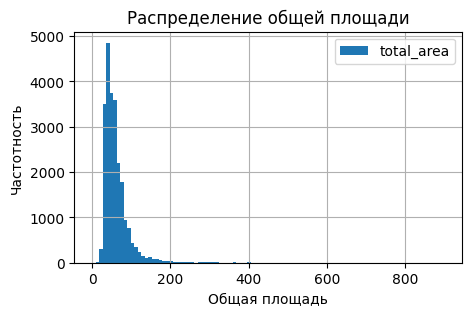

In [49]:
# Выведем на экран гистограмму
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,900));
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Частотность')
plt.show()

In [50]:
# Рассчитаем процент объектов жилья общей площадью свыше 300 кв. м
(data.loc[data['total_area'] > 300]['total_area'].count()/data['total_area'].count()).round(3)

0.003

Данные соответствуют параметрам нормального распределения, среднее значение не сильно отличается от медианного. В наибольшем количестве очевидно представлена недвижимость площадью от 25 до 60 кв. метров. Резко выделяются значения свыше 300 кв. метров. Поскольку их доля в общем объеме данных менее 1%, удалим их из дальнейшего анализа. 

In [51]:
# Исключим из анализа объекты жилья общей площадью свыше 300 кв. м
data_opt = data.loc[data['total_area'] <= 300]

### Жилая площадь

In [52]:
# Выведем описание данных столбца 
data['living_area'].describe()

count    23699.000000
mean        34.355259
std         21.425062
min          2.000000
25%         18.600000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

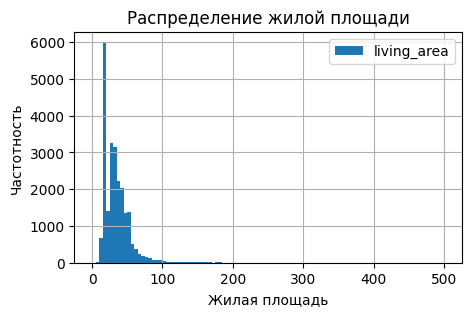

In [53]:
# Выведем на экран гистограмму
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Частотность')
plt.show();

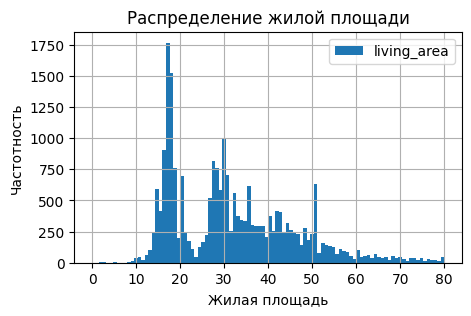

In [54]:
# Выведем на экран гистограмму
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,80))
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Частотность')
plt.show();

In [55]:
# Рассчитаем процент объектов с жилой площадью свыше 200 кв. м
(data.loc[data['living_area'] > 200]['living_area'].count()/data['living_area'].count()).round(3)

0.001

In [56]:
# Выведем количество объектов недвижимости типа "апартаменты" площадью 22-27 кв.м
data.loc[(data['living_area'] > 22) & (data['living_area'] < 27) & (data['is_apartment'] == True)] \
['living_area'].count() / \
data.loc[(data['living_area'] > 22) & (data['living_area'] < 27)]['living_area'].count()

0.8822843822843823

Хотя медианное значение не сильно отличается от среднего, данные не соотвутствуют параметрам нормального распределения. Первый пик значений находится в диапазоне от 15 до 22 кв. метров, второй - в диапазоне от 27 до 32 кв. метров.  
При более детальном анализе выяснилось, что почти 90% объектов недвижимости с жилой площадью от 22 до 27 кв. метров - апартаменты. По всей видимости, они имеют нехарактерный для рынка в целом объем жилой площади при низкой представленности на рынке, создавая аномалию в данных.
Резко выделяются значения свыше 200 кв. метров. Поскольку их доля в общем объеме данных менее 1%, удалим данные значения из дальнейшего анализа.  

In [57]:
# Исключим из анализа объекты с жилой площадью свыше 200 кв. м
data_opt = data_opt.loc[data_opt['living_area'] <= 200]

### Площадь кухни

In [58]:
# Выведем описание данных столбца 
data['kitchen_area'].describe()

count    23699.000000
mean        10.454538
std          5.657222
min          1.300000
25%          7.400000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

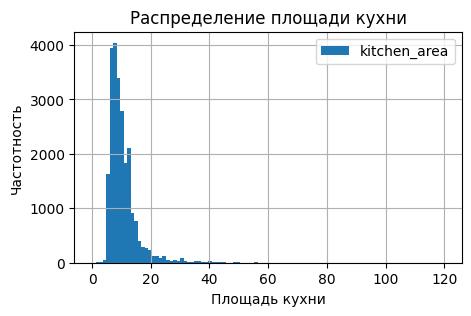

In [59]:
# Выведем на экран гистограмму
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,120))
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Частотность')
plt.show();

In [60]:
# Рассчитаем процент объектов с площадью кухни свыше 40 кв. м
(data.loc[data['kitchen_area'] > 40]['kitchen_area'].count()/data['kitchen_area'].count()).round(3)

0.006

Данные соответствуют параметрам нормального распределения, медианное значение не сильно отличается от среднего. Поскольку общая доля значений свыше 40 кв. метров в общем объеме данных сильно меньше 1%, удалим данные значения из дальнейшего анализа.

In [61]:
# Исключим из анализа объекты с площадью кухни свыше 40 кв. м
data_opt = data_opt.loc[data_opt['kitchen_area'] <= 40]

### Цена объекта

In [62]:
# Выведем описание данных столбца 
data['last_price'].describe()

count     23699.000000
mean       6541.548770
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

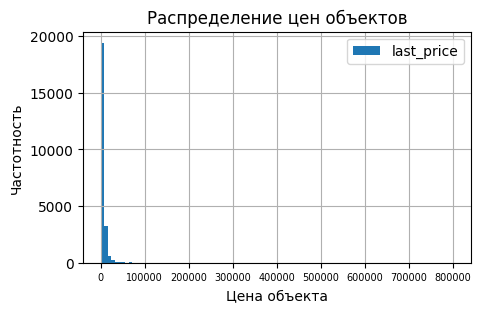

In [63]:
# Выведем на экран гистограмму
data.plot(y ='last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,800000))
plt.title('Распределение цен объектов')
plt.xlabel('Цена объекта')
plt.ylabel('Частотность')
plt.xticks(rotation=0, fontsize=7)
plt.show();

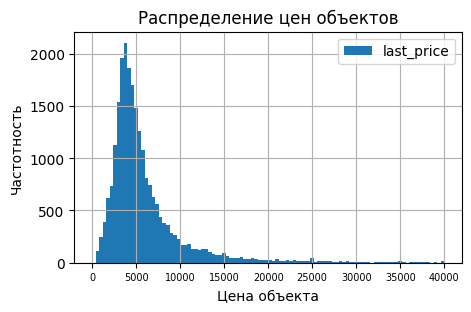

In [64]:
# Выведем на экран гистограмму
data.plot(y ='last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,40000))
plt.title('Распределение цен объектов')
plt.xlabel('Цена объекта')
plt.ylabel('Частотность')
plt.xticks(rotation=0, fontsize=7)
plt.show();

In [65]:
# Рассчитаем процент объектов с ценой свыше 30 млн
(data.loc[data['last_price'] > 30000]['last_price'].count()/data['last_price'].count()).round(3)

0.013

Данные соответствуют параметрам нормального распределения, однако среднее значение значительно отличается от медианного и стремится скорее к значению третьего квартиля. Можно сделать вывод о том, что значительное влияние на данные оказывают кране высокие значения. Уберем значения свыше 30 млн руб., которые составляют немного более 1% данных.

In [66]:
# Исключим из анализа объекты общей стоимостью свыше 30 млн
data_opt = data_opt.loc[data_opt['last_price'] <= 30000]

### Количество комнат

In [67]:
# Выведем описание данных столбца 
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

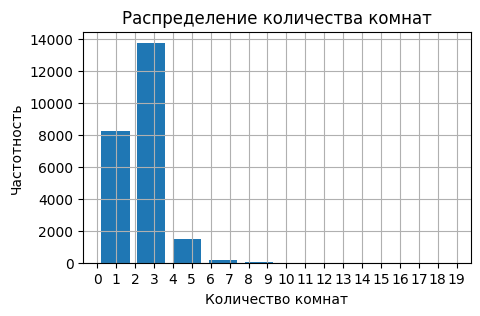

In [68]:
# Выведем на экран гистограмму
data['rooms'].plot(kind='hist', grid=True, figsize=(5, 3), rwidth=0.8)
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частотность')
plt.xticks(range(0, 20))
plt.show(); 

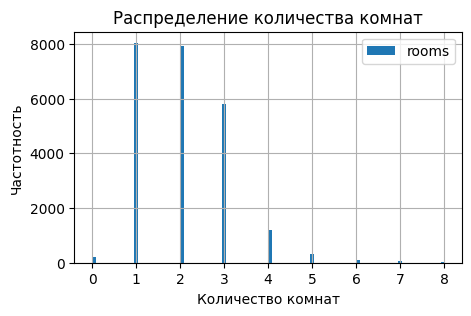

In [69]:
# Выведем на экран гистограмму
data.plot(y ='rooms', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,8))
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частотность')
plt.show(); 

In [70]:
# Рассчитаем процент объектов с количеством комнаты свыше 6
(data.loc[data['rooms'] > 6]['rooms'].count()/data['rooms'].count()).round(3)

0.004

In [71]:
# Рассчитаем процент объектов с нулевым количеством комнаты
(data.loc[data['rooms'] == 0]['rooms'].count()/data['rooms'].count()).round(3)

0.008

Данные соответствуют параметрам нормального распределения, среднее значение практически соответствует медианному. Уберем значения свыше 6, которые составляют менее 1% данных, а также редкие значения 0 комнат, которые выглядят как ошибочные. 

In [72]:
# Исключим из анализа объекты с количеством комнат 0, а также более 6 
data_opt = data_opt.loc[(data_opt['rooms'] <= 6) & (data_opt['rooms'] != 0)]

### Высота потолков

In [73]:
# Выведем описание данных столбца 
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

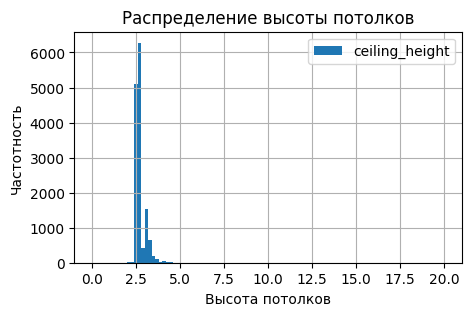

In [74]:
# Выведем на экран гистограмму
data.plot(y ='ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,20))
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Частотность')
plt.show(); 

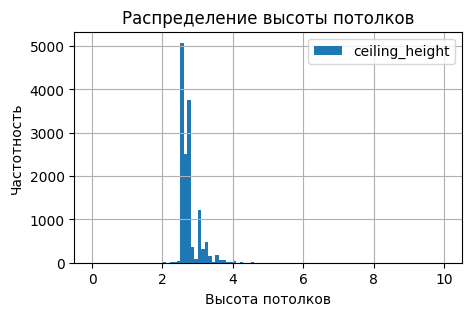

In [75]:
# Выведем на экран гистограмму
data.plot(y ='ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,10))
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Частотность')
plt.show(); 

In [76]:
# Выведем строки с высотой потолков выше 20 м
data.loc[data['ceiling_height'] > 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_metre_price,weekday,month,year,floor_category
355,17,3600.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,9.00,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0,Large,65.217,3,7,2018,другой
3148,14,2900.0,75.0,2018-11-12,3,32.0,3,53.0,2,True,False,False,8.00,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN,Extra_Large,38.667,0,11,2018,другой
4643,0,4300.0,45.0,2018-02-01,2,25.0,9,30.0,2,True,False,False,7.00,1,Санкт-Петербург,12016.0,13.0,1,658.0,1,331.0,181.0,Medium,95.556,3,2,2018,другой
4876,7,3000.0,25.0,2017-09-27,0,27.0,25,17.0,17,True,False,True,8.25,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,28.0,Small,120.000,2,9,2017,другой
5076,0,3850.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.50,0,Санкт-Петербург,29686.0,8.0,3,397.0,1,578.0,7.0,Small,126.230,2,10,2018,первый
5246,0,2500.0,54.0,2017-10-13,2,27.0,5,30.0,3,True,False,False,9.00,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0,Large,46.296,4,10,2017,другой
5669,4,4400.0,50.0,2017-08-08,2,26.0,9,21.3,3,True,False,False,7.00,2,Санкт-Петербург,28981.0,11.0,1,305.0,0,NaN,267.0,Medium,88.000,1,8,2017,другой
5807,17,8150.0,80.0,2019-01-09,2,27.0,36,41.0,13,True,False,False,12.00,5,Санкт-Петербург,18732.0,20.0,0,NaN,3,80.0,38.0,Extra_Large,101.875,2,1,2019,другой
6246,6,3300.0,44.4,2019-03-25,2,25.0,5,31.3,5,True,False,False,5.70,0,Кронштадт,68923.0,51.0,1,417.0,2,73.0,NaN,Medium,74.324,0,3,2019,последний
9379,5,3950.0,42.0,2017-03-26,3,25.0,5,30.0,2,True,False,False,5.20,0,Санкт-Петербург,11647.0,14.0,0,NaN,0,NaN,NaN,Medium,94.048,6,3,2017,другой


Данные соответствуют параметрам нормального распределения, среднее значение не сильно отличается от медианного. Однако в массиве было выявлено небольшое число данных с высотой потолков свыше 20 метров. Можно предположить, что в этом случае речь идет о некорректном внесении данных и, например, 25 м на самом деле 2,5 м. Скорректируем данные значения:

In [77]:
# Разделим на 10 значения потолков выше 20 м в отфильтрованном датасете
data_opt.loc[data_opt['ceiling_height'] > 20, 'ceiling_height'] = data_opt['ceiling_height']/10

Также определим количество строк с высотой потолка менее 2 метров. 

In [78]:
data_opt.loc[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,square_metre_price,weekday,month,year,floor_category
5712,5,1500.0,42.8,2017-08-14,2,1.20,2,27.5,1,True,False,False,5.20,0,поселок городского типа Мга,NaN,NaN,0,NaN,0,NaN,248.0,Medium,35.047,0,8,2017,первый
16934,5,4100.0,40.0,2017-10-17,1,1.75,37,17.4,5,True,False,False,8.34,0,Санкт-Петербург,18732.0,20.0,0,NaN,3,80.0,71.0,Small,102.500,1,10,2017,другой
22590,16,6000.0,55.0,2018-10-31,2,1.00,12,32.4,7,True,False,False,10.00,0,Санкт-Петербург,33053.0,14.0,2,293.0,2,289.0,13.0,Large,109.091,2,10,2018,другой


Поскольку эти данные кажутся выбросами, а их количество ничтожно, уберем данные значения из дальнейшего анализа. 

In [79]:
# Исключим из анализа объекты с высотой потолков более 2 (учитывая наличие пропущенных значений)
data_opt = data_opt.loc[(data_opt['ceiling_height'] >= 2.00) | (data_opt['ceiling_height'].isna())]

### Тип этажа квартиры («первый», «последний», «другой»)

In [80]:
# Выведем описание данных столбца 
data['floor_category'].describe()

count      23699
unique         3
top       другой
freq       17363
Name: floor_category, dtype: object

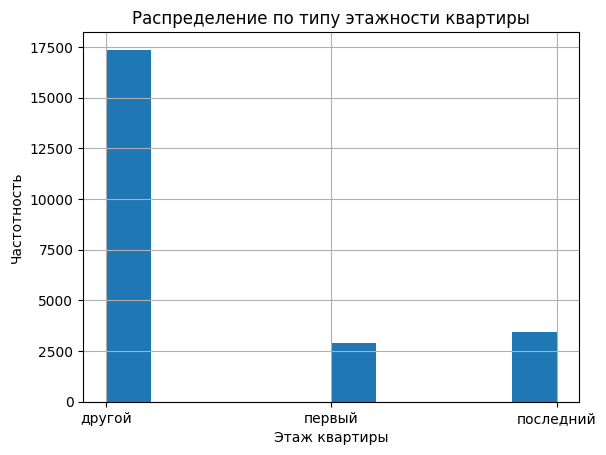

In [ ]:
# Выведем на экран гистограмму
data['floor_category'].hist()
plt.title('Распределение по типу этажности квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Частотность')
plt.show(); 

Распределение кажется вполне логичным, без аномальных значений. Наибольшее количество объектов недвижимости не находятся ни на первом, ни на последнем этаже. 

### Общее количество этажей в доме

In [ ]:
# Выведем описание данных столбца 
data['floors_total'].describe()

In [ ]:
# Выведем на экран гистограмму
data.plot(y ='floors_total', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,70))
plt.title('Распределение по количеству этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Частотность')
plt.show(); 

In [ ]:
# Выведем на экран гистограмму
data.plot(y ='floors_total', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,30))
plt.title('Распределение по количеству этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Частотность')
plt.show(); 

In [ ]:
# Выведем строки с объектами недвижимости в зданиях высотой выше 40 этажей
data.loc[data['floors_total'] > 40]

Среднее значение не сильно отличается от медианного. В данных имеются два значительных пика - 5 и 9 этажей, однако они характеры для типичной городской застройки. Есть два выбивающихся сверхвысоких значения: в 52 и 60 метров. Однако по данным из открытых источников жилых зданий такой высотности в Ленинградской области нет. В этой связи уберем эти данные из массива для дальнейшего анализа. 

In [ ]:
# Исключим из анализа объекты в зданиях высотностью свыше 40 этажей
data_opt = data_opt.loc[data_opt['floors_total'] <= 40]

### Расстояние до центра города

In [ ]:
# Выведем описание данных столбца 
data['cityCenters_nearest'].describe()

In [ ]:
# Выведем на экран гистограмму
data.plot(y ='cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,70))
plt.title('Распределение по расстоянию до центра города')
plt.xlabel('Расстояние до центра города (км)')
plt.ylabel('Частотность')
plt.show(); 

Данные соответствуют параметрам нормального распределения, среднее значение не сильно отличается от медианного. Наибольшее количество объектов недвижимости располагаются на расстояние от 10 до 18 км, что является характерным для такого крупного города как Санкт-Петербург. Оставим имеющиеся данные без корректировки. 

### Расстояние до ближайшего парка

In [ ]:
# Выведем описание данных столбца 
data['parks_nearest'].describe()

In [ ]:
# Выведем на экран гистограмму
data.plot(y ='parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,3200))
plt.title('Распределение по расстоянию до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Частотность')
plt.show(); 

In [ ]:
# Выведем процент объектов с расстоянием до парка свыше 2 км
(data.loc[data['parks_nearest'] > 2000]['parks_nearest'].count()/data['parks_nearest'].count()).round(3)

Данные соответствует параметрам нормального распределения, среднее значение не сильно, но все же ощутимо выше медианного. Наиболее частое значение - пик в районе 500 метров - кажется абсолютно логичным и соответствующим реальности. Для того, чтобы приблизить среднее значение к медианному решено убрать выбивающиеся и редкие значения свыше 2 км, которые составляют менее 1,5% от общего массива. 

In [ ]:
# Исключим из анализа объекты с расстоянием до парка свыше 2 км (учитывая наличие пропущенных значений)
data_opt = data_opt.loc[(data_opt['parks_nearest'] <= 2000) | (data_opt['parks_nearest'].isna())]

### Скорость продажи квартир

Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней «висело» каждое объявление:

In [ ]:
# Выведем описание данных столбца 
data['days_exposition'].describe()

In [ ]:
# Выведем на экран гистограмму
data.plot(y ='days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,1600))
plt.title('Распределение по количеству дней экспозиции объявлений о продаже')
plt.xlabel('Количество дней экспозиции объявлений о продаже')
plt.ylabel('Частотность')
plt.show(); 

In [ ]:
# Выведем процент объектов, выставляемых на продажу на протяжении более 1000 дней
(data.loc[data['days_exposition'] > 1000]['days_exposition'].count()/data['days_exposition'].count()).round(3)

Получившаяся гистограмма представляет собой распределение Пуассона, которое описывает число событий в единицу времени. Обычно продажа занимает около 95 дней (медианное значение), продажи до 45 дней можно считать быстрыми, а свыше 232 дней долгими. При этом небольшое количество крайне долгих продаж, вплоть до 1580 дней, в значительной степени искажают среднее значение. Уберем выбивающиеся и редкие значения свыше 1000 дней, которые составляют около 1% от общего массива. 

In [ ]:
# Исключим из анализа объекты, выставляемые на продажу на протяжении более 1000 дней (учитывая пропуски значений)
data_opt = data_opt.loc[(data_opt['days_exposition'] <= 1000) | (data_opt['days_exposition'].isna())]

**Вывод:** В целом можно сделать вывод о том, что большинство данных по столбцам соответствуют нормальному распределению, при этом в массиве наблюдается небольшое количество крайне высоких выбивающихся значений, которые были отброшены для целей дальнейшего исследования.

- «Общая площадь»: наиболее характерны значения от 25 до 60 кв. метров, отброшены значения свыше 300 кв. метров.
- «Жилая площадь»: наиболее характерны значения - 15-22 и 27-32 кв. метров. В диапазоне 22-27 кв. метров низкое количество значений (почти 90% объектов с подобным метражом - «апартаменты»). Отброшены редкие значения свыше 200 кв. метров.
- «Площадь кухни»: характерые значения - 5-15 кв. метров, значения свыше 40 кв. метров были отброшены как редкие. 
- «Цена объекта»: выбивающиеся высокие значения не оказывали сильное влияние, наиболее часто встречающиеся значения - 3-6 млн. рублей. Значения свыше 30 млн отброшены для целей дальнейшего анализа. 
- «Количество комнат»: типичные значения - от 1 до 3. Для дальнейшего анализа не были учтены нулевые значения параметра, а также значения свыше 6 комнат.
- «Высота потолков»: скорректированы предположительно ошибочные значения свыше 20 метров, убраны значения до 2 метров. 
- «Тип этажей квартиры»: аномалий не выявлено, наиболее частотны значения «другой».
- «Общее количество этажей в доме»: выявлены два пиковых значения (5 и 9 этажей), которые соответствуют типичной городской застройке в России. Отброшены значения свыше 40 как не соответствующие действительности.
- «Расстояние до центра города в км»: наиболее частотные значения - 10-18 км, что характерно для крупного российского города. 
- «Расстояние до ближайшего парка»: характерно пиковое значение в 500 метров, отброшены как редкие значения свыше 2000 метров.
- «Скорость продажи квартир»: представляет собой распределение Пуассона с пиковыми значениями в 45, 60 и 90 дней, что соответствует стандартным срокам публикации квартир в сервисе «Яндекс. Недвижимость». 

## Определение факторов с наибольшим влиянием на полную стоимость объекта

Построим графики, которые покажут зависимость полной стоимости объекта от указанных ниже параметров:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

### Общая площадь

Сделаем сводную таблицу зависимости полной стоимости от общей площади объекта, рассчитаем корреляцию двух значений и построим диаграмму:

In [ ]:
# Создадим сводную таблицу, группируя данные по общей площади 
# и вычисляя количество и медианную цену для каждой группы
pivot_table_total_area = data_opt.pivot_table(index = ['total_area'], 
                                              values=['last_price'], 
                                              aggfunc = ['count', 'median'])

# Переименовываем столбцы сводной таблицы
pivot_table_total_area.columns = ['count', 'median_last_price']

# Визуализируем сводную таблицу
pivot_table_total_area.plot(y = ['median_last_price'], style = 'o')
plt.title('Медианная цена в зависимости от общей площади')
plt.xlabel('Общая площадь (кв. м)')
plt.ylabel('Медианная цена (руб.)')
plt.grid(True)
plt.show()
print();

# Выводим степень корреляции
print(f'Степень корреляции между общей площадью и ценой: {data_opt['total_area'].corr(data_opt['last_price']):.2f}')

Из анализа диаграммы можно сделать вывод о том, что корреляция между полной стоимостью объекта и его общей площадью является линейной и особо ярко выражена для объектов общей площадью до 130 кв. метров с постепенным снижением влияния фактора площади на стоимость по мере роста общей площади. 

### Жилая площадь

Сделаем сводную таблицу зависимости полной стоимости от жилой площади объекта, рассчитаем корреляцию двух значений и построим диаграмму:

In [ ]:
# Создадим сводную таблицу, группируя данные по жилой площади 
# и вычисляя количество и медианную цену для каждой группы
pivot_table_living_area = data_opt.pivot_table(index = ['living_area'], 
                                              values=['last_price'], 
                                              aggfunc = ['count', 'median'])

# Переименовываем столбцы сводной таблицы
pivot_table_living_area.columns = ['count', 'median_last_price']

# Визуализируем сводную таблицу
pivot_table_living_area.plot(y = ['median_last_price'], style = 'o')
plt.title('Медианная цена в зависимости от жилой площади')
plt.xlabel('Жилая площадь (кв. м)')
plt.ylabel('Медианная цена (руб.)')
plt.grid(True)
plt.show()
print();

# Выводим степень корреляции
print(f'Степень корреляции между жилой площадью и ценой: {data_opt['living_area'].corr(data_opt['last_price']):.2f}')

Показатели жилой площади и полной стоимости имеют чуть меньшую корреляцию, однако она все еще носит прямой и линейный характер, что отражается на диаграмме. Линейная зависимость прослеживается особенно сильно для объектов с жилой площадью до 75 кв. метров.  

### Площадь кухни

Сделаем сводную таблицу зависимости полной стоимости объекта от площади кухни, рассчитаем корреляцию двух значений и построим диаграмму:

In [ ]:
# Создадим сводную таблицу, группируя данные по площади кухни
# и вычисляя количество и медианную цену для каждой группы
pivot_table_kitchen_area = data_opt.pivot_table(index = ['kitchen_area'], 
                                              values=['last_price'], 
                                              aggfunc = ['count', 'median'])

# Переименовываем столбцы сводной таблицы
pivot_table_kitchen_area.columns = ['count', 'median_last_price']

# Визуализируем сводную таблицу
pivot_table_kitchen_area.plot(y = ['median_last_price'], style = 'o')
plt.title('Медианная цена в зависимости от площади кухни')
plt.xlabel('Площадь кухни (кв. м)')
plt.ylabel('Медианная цена (руб.)')
plt.grid(True)
plt.show()
print();

# Выводим степень корреляции
print(f'Степень корреляции между площадью кухни и ценой: {data_opt['kitchen_area'].corr(data_opt['last_price']):.2f}')

Показатели площади кухни и полной стоимости имеют меньшую корреляцию по сравнению с зависимостью стоимости от общей и жилой площади, однако корреляция еще сохраняется, что можно видеть на диаграмме. Линейная зависимость прослеживается особенно сильно для объектов с площадью кухни до 15 кв. метров. 

### Количество комнат

Сделаем сводную таблицу зависимости полной стоимости объекта от количества комнат, рассчитаем корреляцию двух значений и построим диаграмму:

In [ ]:
# Создадим сводную таблицу, группируя данные по количеству комнат
# и вычисляя количество и медианную цену для каждой группы
pivot_table_rooms = data_opt.pivot_table(index = ['rooms'], 
                                              values=['last_price'], 
                                              aggfunc = ['count', 'median'])

# Переименовываем столбцы сводной таблицы
pivot_table_rooms.columns = ['count', 'median_last_price']

# Визуализируем сводную таблицу
pivot_table_rooms.plot(y = ['median_last_price'], style = '-o')
plt.title('Медианная цена в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена (руб.)')
plt.grid(True)
plt.show()
print();

# Выводим степень корреляции
print(f'Степень корреляции между количеством комнат и ценой: {data_opt['rooms'].corr(data_opt['last_price']):.2f}')

Определенная корреляция между количеством комнат и общей стоимостью объекта недвижимости имеется. При этом стоит отметить, что в диапазоне от 1 до 4 комнат стоимость объекта возрастает практически линейно, а добавление каждой последующей комнаты приводит к более значительному увеличению стоимости. 

### Тип этажа, на котором расположена квартира (первый, последний, другой)

Сделаем сводную таблицу зависимости полной стоимости объекта от типа этажа, на котором расположен объект, и построим диаграмму:

In [ ]:
# Создадим сводную таблицу, группируя данные по этажности
# и вычисляя количество и медианную цену для каждой группы
pivot_table_floor_category = data_opt.pivot_table(index = ['floor_category'], 
                                              values=['last_price'], 
                                              aggfunc = ['count', 'median'])

# Переименовываем столбцы сводной таблицы
pivot_table_floor_category.columns = ['count', 'median_last_price']

# Визуализируем сводную таблицу
pivot_table_floor_category.plot(y = ['median_last_price'], style = '-o')
plt.title('Медианная цена в зависимости от этажности')
plt.xlabel('Этажность')
plt.ylabel('Медианная цена (руб.)')
plt.grid(True)
plt.show()
print();

Исходя из получившейся диаграммы можно сделать вывод о том, что на стоимость объекта недвижимости наиболее сильно влияет факт его расположения на первом этаже, значительно снижая общую стоимость объекта. При этом расположение объекта на последнем этаже также менее предпочтительно, чем на других, что отражается на общей стоимости недвижимости. 

### Даты размещения (день недели, месяц, год)

#### День недели размещения объявления

Сделаем сводную таблицу зависимости полной стоимости от **дня** размещения объекта в сервисе и построим диаграмму:

In [ ]:
# Создадим сводную таблицу, группируя данные по дню недели
# и вычисляя количество и медианную цену для каждой группы
pivot_table_day_exposition = data_opt.pivot_table(index = ['weekday'], 
                                              values=['last_price'], 
                                              aggfunc = ['count', 'median'])

# Переименовываем столбцы сводной таблицы
pivot_table_day_exposition.columns = ['count', 'median_last_price']

# Визуализируем сводную таблицу
pivot_table_day_exposition.plot(y = ['median_last_price'], style = '-o')
plt.title('Медианная цена в зависимости от дня недели размещения объявления')
plt.xlabel('День недели размещения объявления')
plt.ylabel('Медианная цена (руб.)')
plt.grid(True)
plt.show()
print();

Согласно графику объявления о наиболее высокостоимостных объектах размещают во вторник и среду, самая низкая стоимость у объектов, размещенных в выходные (субботу и воскресенье). 
Можно предположить, что в течение рабочей недели объявления в большом количестве размещают агентства по недвижимости, риэлторы, в то время как в субботу основной источник объявлений - непосредственные владельцы объектов недвижимости. 

#### Месяц размещения объявления

Сделаем сводную таблицу зависимости полной стоимости от **месяца** размещения объекта в сервисе и построим диаграмму:

In [ ]:
# Создадим сводную таблицу, группируя данные по месяцу
# и вычисляя количество и медианную цену для каждой группы
pivot_table_month_exposition = data_opt.pivot_table(index = ['month'], 
                                              values=['last_price'], 
                                              aggfunc = ['count', 'median'])

# Переименовываем столбцы сводной таблицы
pivot_table_month_exposition.columns = ['count', 'median_last_price']

# Визуализируем сводную таблицу
pivot_table_month_exposition.plot(y = ['median_last_price'], style = '-o')
plt.title('Медианная цена в зависимости от месяца размещения объявления')
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Медианная цена (руб.)')
plt.grid(True)
plt.show()
print();

Как и в случае с днями недели прямой линейной корреляции между месяцем размещения объявления и стоимостью объекта недвижимости не прослеживается, однако есть месяцы с особо высокими и низкими показателями. Например, высокими значениями цен характеризуются апрель, сентябрь и ноябрь. Это можно объяснить сезонностью рынка недвижимости, где наиболее популярные месяцы для совершения сделок - середина весны, начало учебного года и конец календарного (высокий спрос влечет за собой повышение цены). При этом отрицательное пиковое значение приходится на июнь, начало отпускного сезона.

#### Год размещения объявления

Сделаем сводную таблицу зависимости полной стоимости от **года** размещения объекта в сервисе и построим диаграмму:

In [ ]:
# Создадим сводную таблицу, группируя данные по году
# и вычисляя количество и медианную цену для каждой группы
pivot_table_year_exposition = data_opt.pivot_table(index = ['year'], 
                                              values=['last_price'], 
                                              aggfunc = ['count', 'median'])

# Переименовываем столбцы сводной таблицы
pivot_table_year_exposition.columns = ['count', 'median_last_price']

# Визуализируем сводную таблицу
pivot_table_year_exposition.plot(y = ['median_last_price'], style = '-o')
plt.title('Медианная цена в зависимости от года размещения объявления')
plt.xlabel('Год размещения объявления')
plt.ylabel('Медианная цена (руб.)')
plt.grid(True)
plt.show()
print();

Зависимость общей стоимости недвижимости по годам не является прямой и линейной, однако она полностью отражает экономическое состояние страны в обозначенный период, полностью повторяя кривую ВВП России на отрезке 2014-2019 годов.

**Вывод:** По результатам анализа данных можно заключить, что наибольшее влияние на полную стоимость объекта недвижимости на основании представленного массива данных оказывает общая площадь. При этом корреляция между двумя параметрами особенно ярко выражена для объектов площадью до 130 кв. метров.

Далее зависимость планомерно снижается при переходе от параметра «Общая площадь» к параметрам:
- «Жилая площадь» (корреляция особо видна в диапазоне до 75 кв. метров) 
- «Площадь кухни» (корреляция выражена только для объектов с площадью кухни до 15 кв. метров). 

Для параметра «Количество комнат» в диапазоне от 1 до 4 комнат стоимость объекта возрастает линейно, а добавление каждой последующей комнаты приводит к более значительному увеличению стоимости.

Наименее предпочтительным среди этажей является первый, что отражается на стоимости объектов. Наиболее высокой стоимостью обладают объекты недвижимости, которые не располагаются ни на первом, ни на последнем этаже. 

Наиболее низкостоимостные объекты размещают в конце недели (суббота и воскресенье), высокостоимостные - во вторник и среду. Месяцы, в которые стоимость размещенных объектов недвижимости резко возрастает – апрель, сентябрь и ноябрь, наименьшая стоимость у объектов, размещенных в июне, что характерно для сезонного рынка недвижимости. 

Наконец, зависимость общей стоимости недвижимости по годам полностью повторяет кривую ВВП России на отрезке 2014-2019 годов.

## Расчет минимальной, средней и максимальной цены квадратного метра

### Средняя цена квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

Для начала, определим 10 населенных пунктов с наибольшим числом объявлений и выведем промежуточный датафрейм, содержащий информацию только по данным населенным пунктам:

In [ ]:
# Выведем топ-10 населенных пунктов по числу объявлений
most_frequent_locations = data_opt['locality_name'].value_counts().head(10)
most_frequent_locations = most_frequent_locations.to_frame()
most_frequent_locations

In [ ]:
# Создадим отфильтрованный датафрейм с данными по топ-10 населенным пунктам по числу объявлений
data_opt_frequent_locations = data_opt.loc[data_opt['locality_name'].isin(most_frequent_locations.index)]

Построим сводную таблицу с информацией о средней цене квадратного метра в тыс. руб. в 10 населенных пунктах с наибольшим числом объявлений, отсортируем полученные результаты по убыванию значений и округлим до 3 знаков после разделителя разрядов:

In [ ]:
# Создадим сводную таблицу со средними ценами за кв. м для топ-10 населенных пунктов по числу объявлений
pivot_table_mean_square_metre_price = data_opt_frequent_locations.pivot_table(index = ['locality_name'], 
                                                                              values=['square_metre_price'], 
                                                                              aggfunc = 'mean')
pivot_table_mean_square_metre_price = pivot_table_mean_square_metre_price.sort_values(by = 'square_metre_price', 
                                                                                      ascending = False).round(3)
# Построим столбчатую диаграмму
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=pivot_table_mean_square_metre_price.index, 
                 y=pivot_table_mean_square_metre_price['square_metre_price'], 
                 color='steelblue')

# Добавим метки данных на каждый столбец
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=11)

# Добавим подписи
plt.title('Средняя цена за квадратный метр по населенным пунктам', fontsize = 20)
plt.xlabel('Название населенного пункта', fontsize = 15)
plt.ylabel('Средняя цена за квадратный метр (руб.)', fontsize = 15)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

### Минимальная и максимальная цена квадратного метра

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра исходя из усредненных значений, отчищенных от выбросов и аномалий:

In [ ]:
# Сформируем сводную таблицу для поиска средних значений стоимости кв. м во всех населенных пунктах
pivot_table_minmax_square_metre_price = data_opt.pivot_table(index = ['locality_name'], 
                                                             values=['square_metre_price'], 
                                                             aggfunc = 'mean')

# Отсортируем сводную таблицу по уменьшению значения стоимости кв. метра
pivot_table_sorted = pivot_table_minmax_square_metre_price.sort_values(by = 'square_metre_price', 
                                                                       ascending = False).round(3)

# Найдем максимальное значение цены за квадратный метр и индекс строки
max_value = pivot_table_sorted['square_metre_price'].max()
max_index = pivot_table_sorted['square_metre_price'].idxmax()

# Найдем минимальное значение цены за квадратный метр и индекс строки
min_value = pivot_table_sorted['square_metre_price'].min()
min_index = pivot_table_sorted['square_metre_price'].idxmin()

print()
print(f"Максимальная цена за квадратный метр {max_value} в населенном пункте {max_index}")
print(f"Минимальная цена за квадратный метр {min_value} в населенном пункте {min_index}")
print()

Как видно из данных выше
- наиболее высокая цена за квадратный метр в Ленинградской области среди населенных пунктов с наибольшим числом объявлений (топ-10) зафиксирована в Санкт-Петербурге (столица региона), Пушкине (до 1918 года - Царское Село) и деревне Кудрово (примыкает непосрдественно к территории Санкт-Петербурга);
- наиболее дорогим для приобретения недвижимости в Ленинградской области на основе усредненных значений является Зеленогорск, внутригородское муниципальное образование в составе Курортного района Санкт-Петербурга, а наиболее дешевые по цене за квадратный метр предложения недвижимости - в деревне Старополье. 

### Расчет средней цены каждого километра в пределах Санкт-Петербурга

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра.

Для начала, сформируем промежуточный датафрейм, содержащий информацию только по объектам недвижимости, расположенным в Санкт-Петербурге:

In [ ]:
SPB_data_opt = data_opt.loc[data_opt['locality_name'] == 'Санкт-Петербург']

Сформируем сводную таблицу, отражающую среднюю общую стоимость объекта недвижимости по мере удаления от центра города, и выведем диаграмму, иллюстрирующую полученные данные:

In [ ]:
# Формируем сводную таблицу со средними данными о цене по каждому километру до центра города
pivot_table_km_mean = SPB_data_opt.pivot_table(index = ['cityCenters_nearest'], 
                                               values=['last_price'], 
                                               aggfunc='mean')
# Выведем диаграмму 
plt.figure(figsize=(14, 8))
ax = pivot_table_km_mean.plot(y='last_price', kind='line', legend=False, color='steelblue', marker='o')
ax.set_title('Средняя цена за квартиру в зависимости от расстояния до центра города', fontsize=14)
ax.set_xlabel('Расстояние до центра города (км)', fontsize=12)
ax.set_ylabel('Средняя цена (руб.)', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show();

Из диаграммы видно, что по мере удаления от центра стоимость объектов планомерно снижается на отрезке от 0 до 25 км, однако на отрезке в 25-30 км есть большое пиковое значение. Можно предположить, что основную часть данного пикового значения составляют частные дома и недвижимость в элитных районах, которые все еще входят в территорию Санкт-Петербурга, однако выгодно отличаются от основной городской застройки по своим экологическим параметрам. 

## Общий вывод

По итогу проведенного анализа можно сделать вывод о том, что наиболее частой причиной пропуска данных является техническая ошибка при автозаполнении, которая может быть устранена повторной выгрузкой. В целом, представленных данных достаточно для проведения исследования. 

Большинство данных по столбцам соответствуют параметрам нормального распределения, при этом для целей дальнейшего анализа были отброшены ошибочные либо слишком высокие значения. 

Наибольшей частотностью обладают объекты недвижимости общей площадью 25-60 кв. метров с жилой площадью в диапазоне 15-22 кв. метров и 27-32 кв. метров. В диапазоне значений жилой площади 22-27 кв. метров представлены, в основном, апартаменты. Наиболее характерные площадь кухни - 5-15 кв. метров, цена объекта - 3-6 млн. рублей, количество комнат - 1-3. Преимущественно квартиры не располагаются ни на первом, ни на последнем этаже, зачастую в зданиях высотой в 5 и 9 этажей, на расстоянии 10-18 км от центра города, с ближайшим парком в 500 метрах от дома. 

Для объектов с небольшой и средней общей площадью до 130 кв. метров, жилой площадью до 75 кв. метров, кухней до 15 кв. метров и количеством комнат до 4 площадь и количество комнат оказывают прямое влинияние на полную стоимость. С ростом площади объекта корреляция снижается, на стоимость начинают сильнее влиять прочие параметры объекта. 

На снижение общей стоимости оказывает влияние расположение на первом и последнем этаже. 

Рынок недвижимости Ленинградской области отличается сезонностью с пиками размещения наиболее высокостоимостных объектов (как результат увеличения спроса) в апреле, сентябре и ноябре. Также он находится в прямой зависимости от общего экономического положения в стране. 

Населенные пункты с наибольшей ценой квадратного метра - Зеленогорск и Санкт-Петербург, самая дешевая недвижимость в деревне Старополье. 

По мере удаления от центра стоимость недвижимости планомерно снижается на отрезке от 0 до 25 км, далее она пиково растет при расположении квартир в элитных периферийных районах на расстоянии от 25 до 30 км от центра. 